In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [5]:
df1 = pd.read_excel('/content/drive/MyDrive/MRA project/Sales_Data.xlsx')

In [6]:
df1.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [8]:
df1.shape

(2747, 20)

In [9]:
df1.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098951,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042548,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [10]:
df1.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,NaN,NaN,NaN,NaT,NaT,10259.761558,91.877521,10100.0,10181.0,10264.0,10334.5,10425.0
QUANTITYORDERED,2747.0,NaN,NaN,NaN,NaT,NaT,35.103021,9.762135,6.0,27.0,35.0,43.0,97.0
PRICEEACH,2747.0,NaN,NaN,NaN,NaT,NaT,101.098951,42.042548,26.88,68.745,95.55,127.1,252.87
ORDERLINENUMBER,2747.0,NaN,NaN,NaN,NaT,NaT,6.491081,4.230544,1.0,3.0,6.0,9.0,18.0
SALES,2747.0,NaN,NaN,NaN,NaT,NaT,3553.047583,1838.953901,482.13,2204.35,3184.8,4503.095,14082.8
ORDERDATE,2747,246,2018-11-14 00:00:00,38,2018-01-06,2020-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_SINCE_LASTORDER,2747.0,NaN,NaN,NaN,NaT,NaT,1757.085912,819.280576,42.0,1077.0,1761.0,2436.5,3562.0
STATUS,2747,6,Shipped,2541,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRODUCTLINE,2747,7,Classic Cars,949,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSRP,2747.0,NaN,NaN,NaN,NaT,NaT,100.691664,40.114802,33.0,68.0,99.0,124.0,214.0


In [11]:
df1.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [12]:
df1.duplicated().sum()

0

<Axes: xlabel='QUANTITYORDERED'>

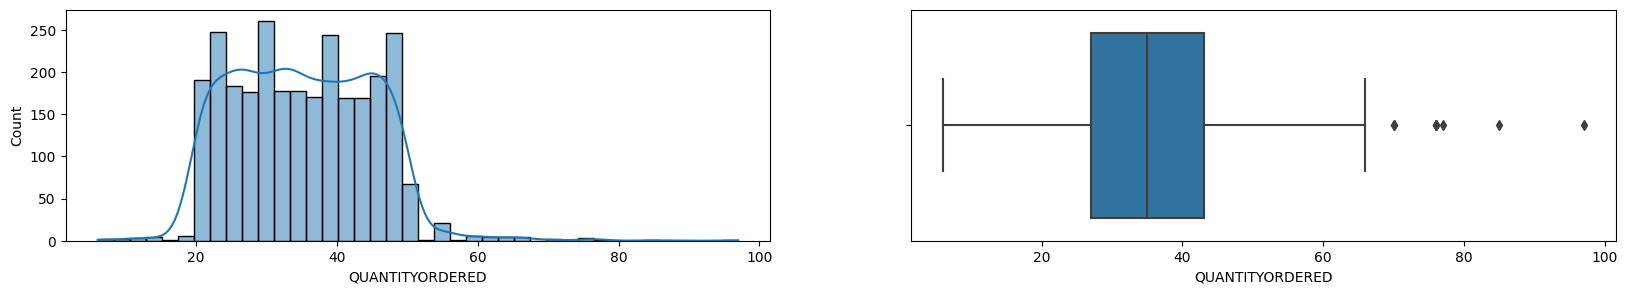

In [14]:
fig_dims = (20, 3)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(df1.QUANTITYORDERED, kde=True, ax=axs[0])
sns.boxplot(x= 'QUANTITYORDERED', data=df1, ax=axs[1])

<Axes: xlabel='PRICEEACH'>

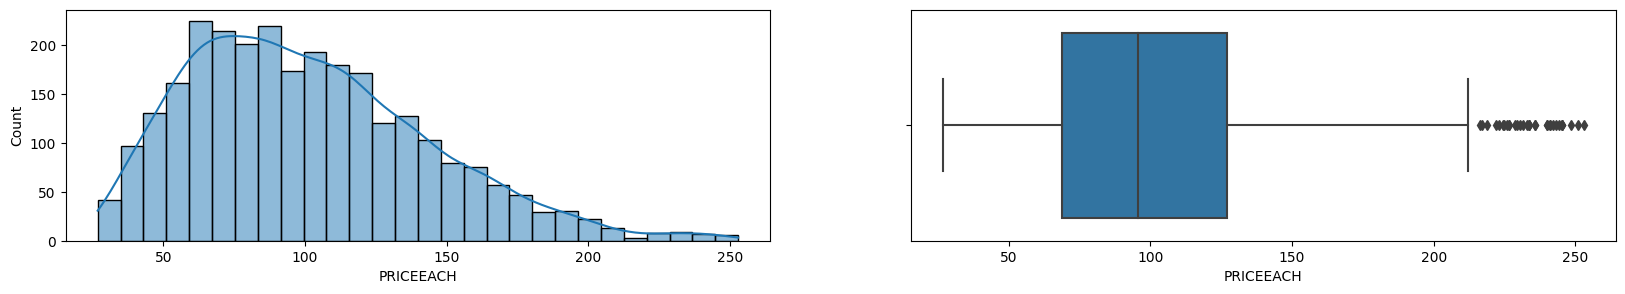

In [15]:
fig_dims = (20, 3)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(df1.PRICEEACH, kde=True, ax=axs[0])
sns.boxplot(x= 'PRICEEACH', data=df1, ax=axs[1])

<Axes: xlabel='SALES'>

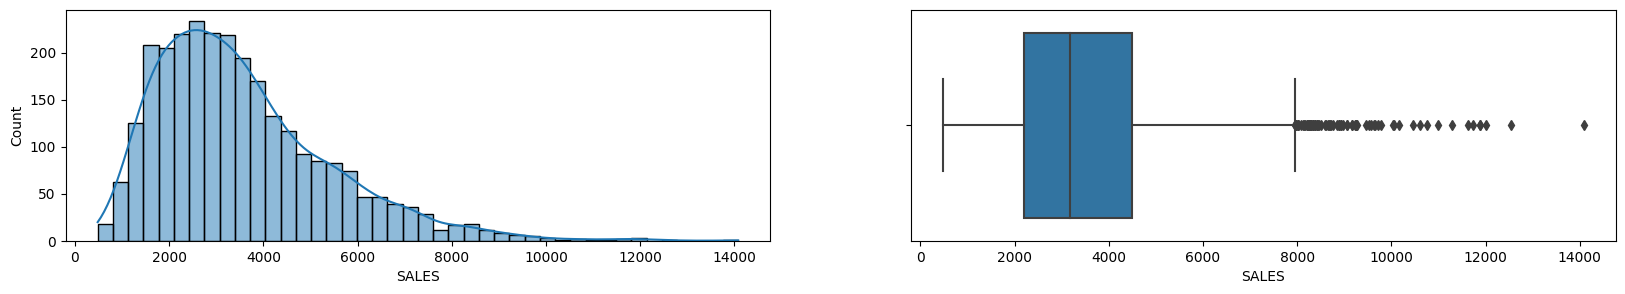

In [16]:
fig_dims = (20, 3)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(df1.SALES, kde=True, ax=axs[0])
sns.boxplot(x= 'SALES', data=df1, ax=axs[1])

<Axes: xlabel='MSRP'>

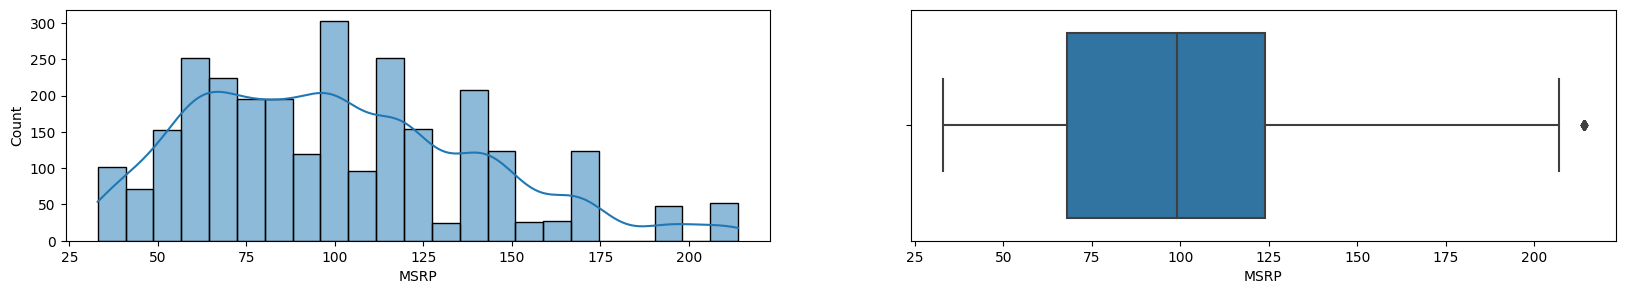

In [17]:
fig_dims = (20, 3)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(df1.MSRP, kde=True, ax=axs[0])
sns.boxplot(x= 'MSRP', data=df1, ax=axs[1])